In [1]:
from music21 import converter
from music21.vexflow.toMusic21j import fromObject
from pathlib import Path
import sys
sys.path.append('../../src')
# from common import gzPickleIter
# hymnsPath = Path('../../datasets/hymns/hymns.pkl.gz')
hymnsPath = Path('../../datasets/hymns/sequences.txt')
from hymns import load2 as loadHymnSequences

In [2]:
data = loadHymnSequences(hymnsPath)

Loading sequences


100%|██████████| 20/20 [00:01<00:00, 19.57it/s]


In [3]:
data[2].show('musicxml')

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [7]:
from essen import load2 as loadEssenSequences
from essen import loadSequenceFile
essenPath = Path('../../datasets/essen/sequences.txt')
data = loadEssenSequences(essenPath)
for d in data:
    index, score = d
    if index == 42:
        break

In [8]:
score.show('musicxml')

In [12]:
import random
for i in range(100):
    a = random.randint(0, 255)
    b = random.randint(0, 255)
    c = random.randint(0, 255)
    print(f'[{i}, "rgba({a}, {b}, {c}, 0.4)"],')

[0, "rgba(58, 127, 84, 0.4)"],
[1, "rgba(82, 119, 181, 0.4)"],
[2, "rgba(254, 217, 166, 0.4)"],
[3, "rgba(84, 223, 39, 0.4)"],
[4, "rgba(110, 149, 216, 0.4)"],
[5, "rgba(27, 103, 81, 0.4)"],
[6, "rgba(161, 214, 111, 0.4)"],
[7, "rgba(134, 43, 73, 0.4)"],
[8, "rgba(48, 67, 68, 0.4)"],
[9, "rgba(46, 61, 193, 0.4)"],
[10, "rgba(6, 209, 94, 0.4)"],
[11, "rgba(51, 67, 2, 0.4)"],
[12, "rgba(10, 226, 34, 0.4)"],
[13, "rgba(127, 99, 203, 0.4)"],
[14, "rgba(107, 26, 229, 0.4)"],
[15, "rgba(229, 69, 59, 0.4)"],
[16, "rgba(127, 44, 111, 0.4)"],
[17, "rgba(44, 170, 166, 0.4)"],
[18, "rgba(123, 77, 111, 0.4)"],
[19, "rgba(119, 126, 56, 0.4)"],
[20, "rgba(2, 82, 162, 0.4)"],
[21, "rgba(156, 129, 101, 0.4)"],
[22, "rgba(196, 148, 250, 0.4)"],
[23, "rgba(50, 241, 226, 0.4)"],
[24, "rgba(250, 29, 197, 0.4)"],
[25, "rgba(215, 137, 138, 0.4)"],
[26, "rgba(167, 170, 234, 0.4)"],
[27, "rgba(27, 185, 60, 0.4)"],
[28, "rgba(206, 58, 204, 0.4)"],
[29, "rgba(81, 109, 34, 0.4)"],
[30, "rgba(251, 113, 29, 0.4)"]

Text(0.5, 1.0, 'Discovered Patterns for Hymn 6, $\\tau = 0.8$')

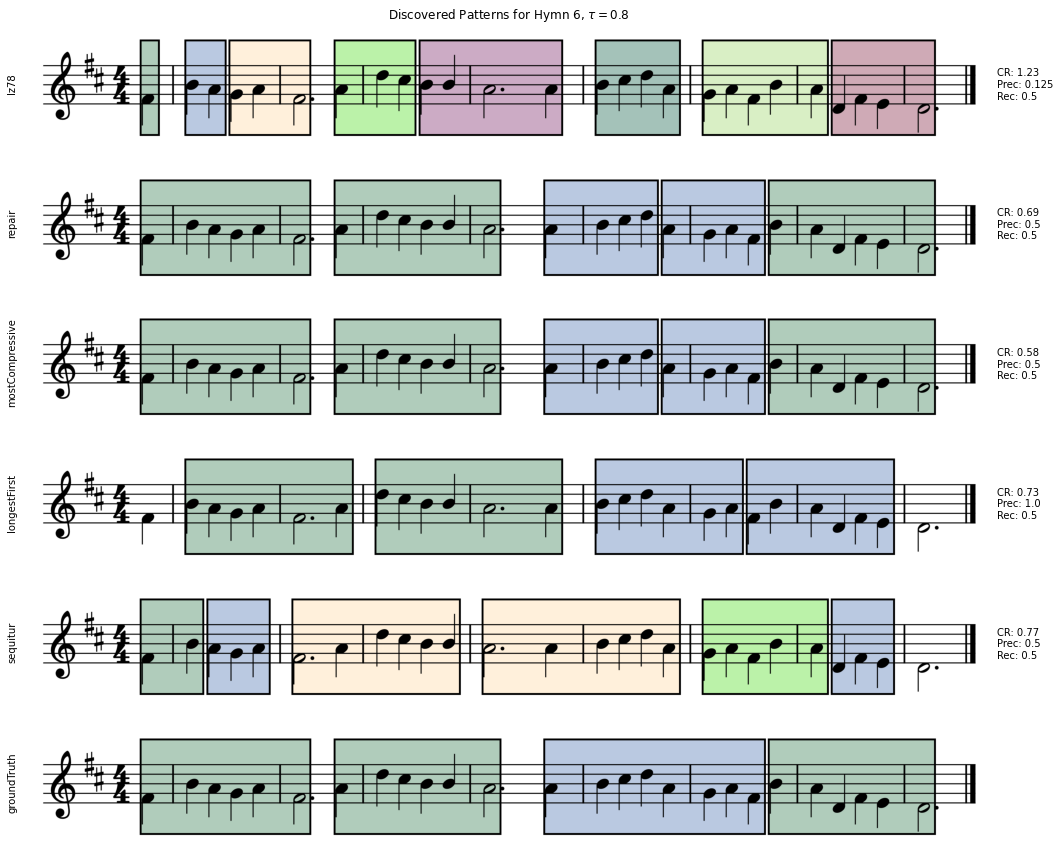

In [122]:
from PIL import Image
from pathlib import Path
from IPython.display import display
import matplotlib.pyplot as plt

screenshotsPath = Path('../screenshots/hymn6')
scale = 5
fig, ax = plt.subplots(6, 1, figsize=(6*scale, 3*scale))

files = {
    'lz78': '',
    'repair': '',
    'mostCompressive': '',
    'longestFirst': '',
    'sequitur': '',
    'groundTruth': ''
}

labels = [
    'CR: 1.23\nPrec: 0.125\nRec: 0.5',
    'CR: 0.69\nPrec: 0.5\nRec: 0.5',
    'CR: 0.58\nPrec: 0.5\nRec: 0.5',
    'CR: 0.73\nPrec: 1.0\nRec: 0.5',
    'CR: 0.77\nPrec: 0.5\nRec: 0.5',
    ''
]
for i, screenshotFile in enumerate(screenshotsPath.glob('*.PNG')):
    name = screenshotFile.stem
    files[name] = screenshotFile

for i, (name, file) in enumerate(files.items()):
    img = Image.open(file)
    x, y = 350, 840
    w, h = 3100, 370
    img = img.crop((x, y, x+w, y+h))
    # display(img)
    ax[i].imshow(img)
    # ax[i].axis('off')
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].set_ylabel(name)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    ax[i].annotate(labels[i], xy=(1,0.5), xytext=(0, 15), ha='left', va='top',
            xycoords='axes fraction', textcoords='offset points')

ax[0].set_title(r'Discovered Patterns for Hymn 6, $\tau = 0.8$')



longestFirst ..\screenshots\hymn6\longestFirst.PNG
groundTruth ..\screenshots\hymn6\groundTruth.PNG


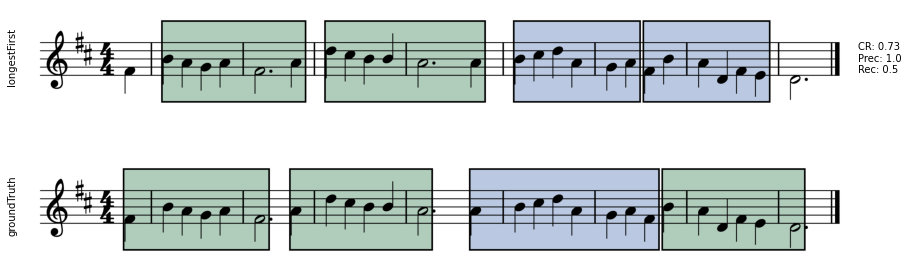

In [127]:
from PIL import Image
from pathlib import Path
from IPython.display import display
import matplotlib.pyplot as plt

screenshotsPath = Path('../screenshots/hymn6')
scale = 5
fig, ax = plt.subplots(2, 1, figsize=(3*scale, 1*scale))

files = {
    'longestFirst': '',
    'groundTruth': ''
}

labels = [
    'CR: 0.73\nPrec: 1.0\nRec: 0.5',
    ''
]
for i, screenshotFile in enumerate(screenshotsPath.glob('*.PNG')):
    name = screenshotFile.stem
    if name not in files:
        continue
    files[name] = screenshotFile

for i, (name, file) in enumerate(files.items()):
    print(name, file)
    img = Image.open(file)
    x, y = 350, 840
    w, h = 3100, 370
    img = img.crop((x, y, x+w, y+h))
    # display(img)
    ax[i].imshow(img)
    # ax[i].axis('off')
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].set_ylabel(name)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    ax[i].annotate(labels[i], xy=(1,0.5), xytext=(0, 15), ha='left', va='top',
            xycoords='axes fraction', textcoords='offset points')



In [131]:
prec = 1.0
rec = 0.5
f1 = lambda p, r: (2 * p * r) / (p + r)
f1(prec, rec)
wf1 = lambda p, r, beta: (1 + beta**2) * ((p * r) / ((beta**2 * p) + r))
wf1(prec, rec, 1.5)

0.5909090909090909

{'lz78': WindowsPath('../screenshots/hymn2/lz78.PNG'), 'repair': WindowsPath('../screenshots/hymn2/repair.PNG'), 'mostCompressive': WindowsPath('../screenshots/hymn2/mostCompressive.PNG'), 'longestFirst': WindowsPath('../screenshots/hymn2/longestFirst.PNG'), 'sequitur': WindowsPath('../screenshots/hymn2/sequitur.PNG')}


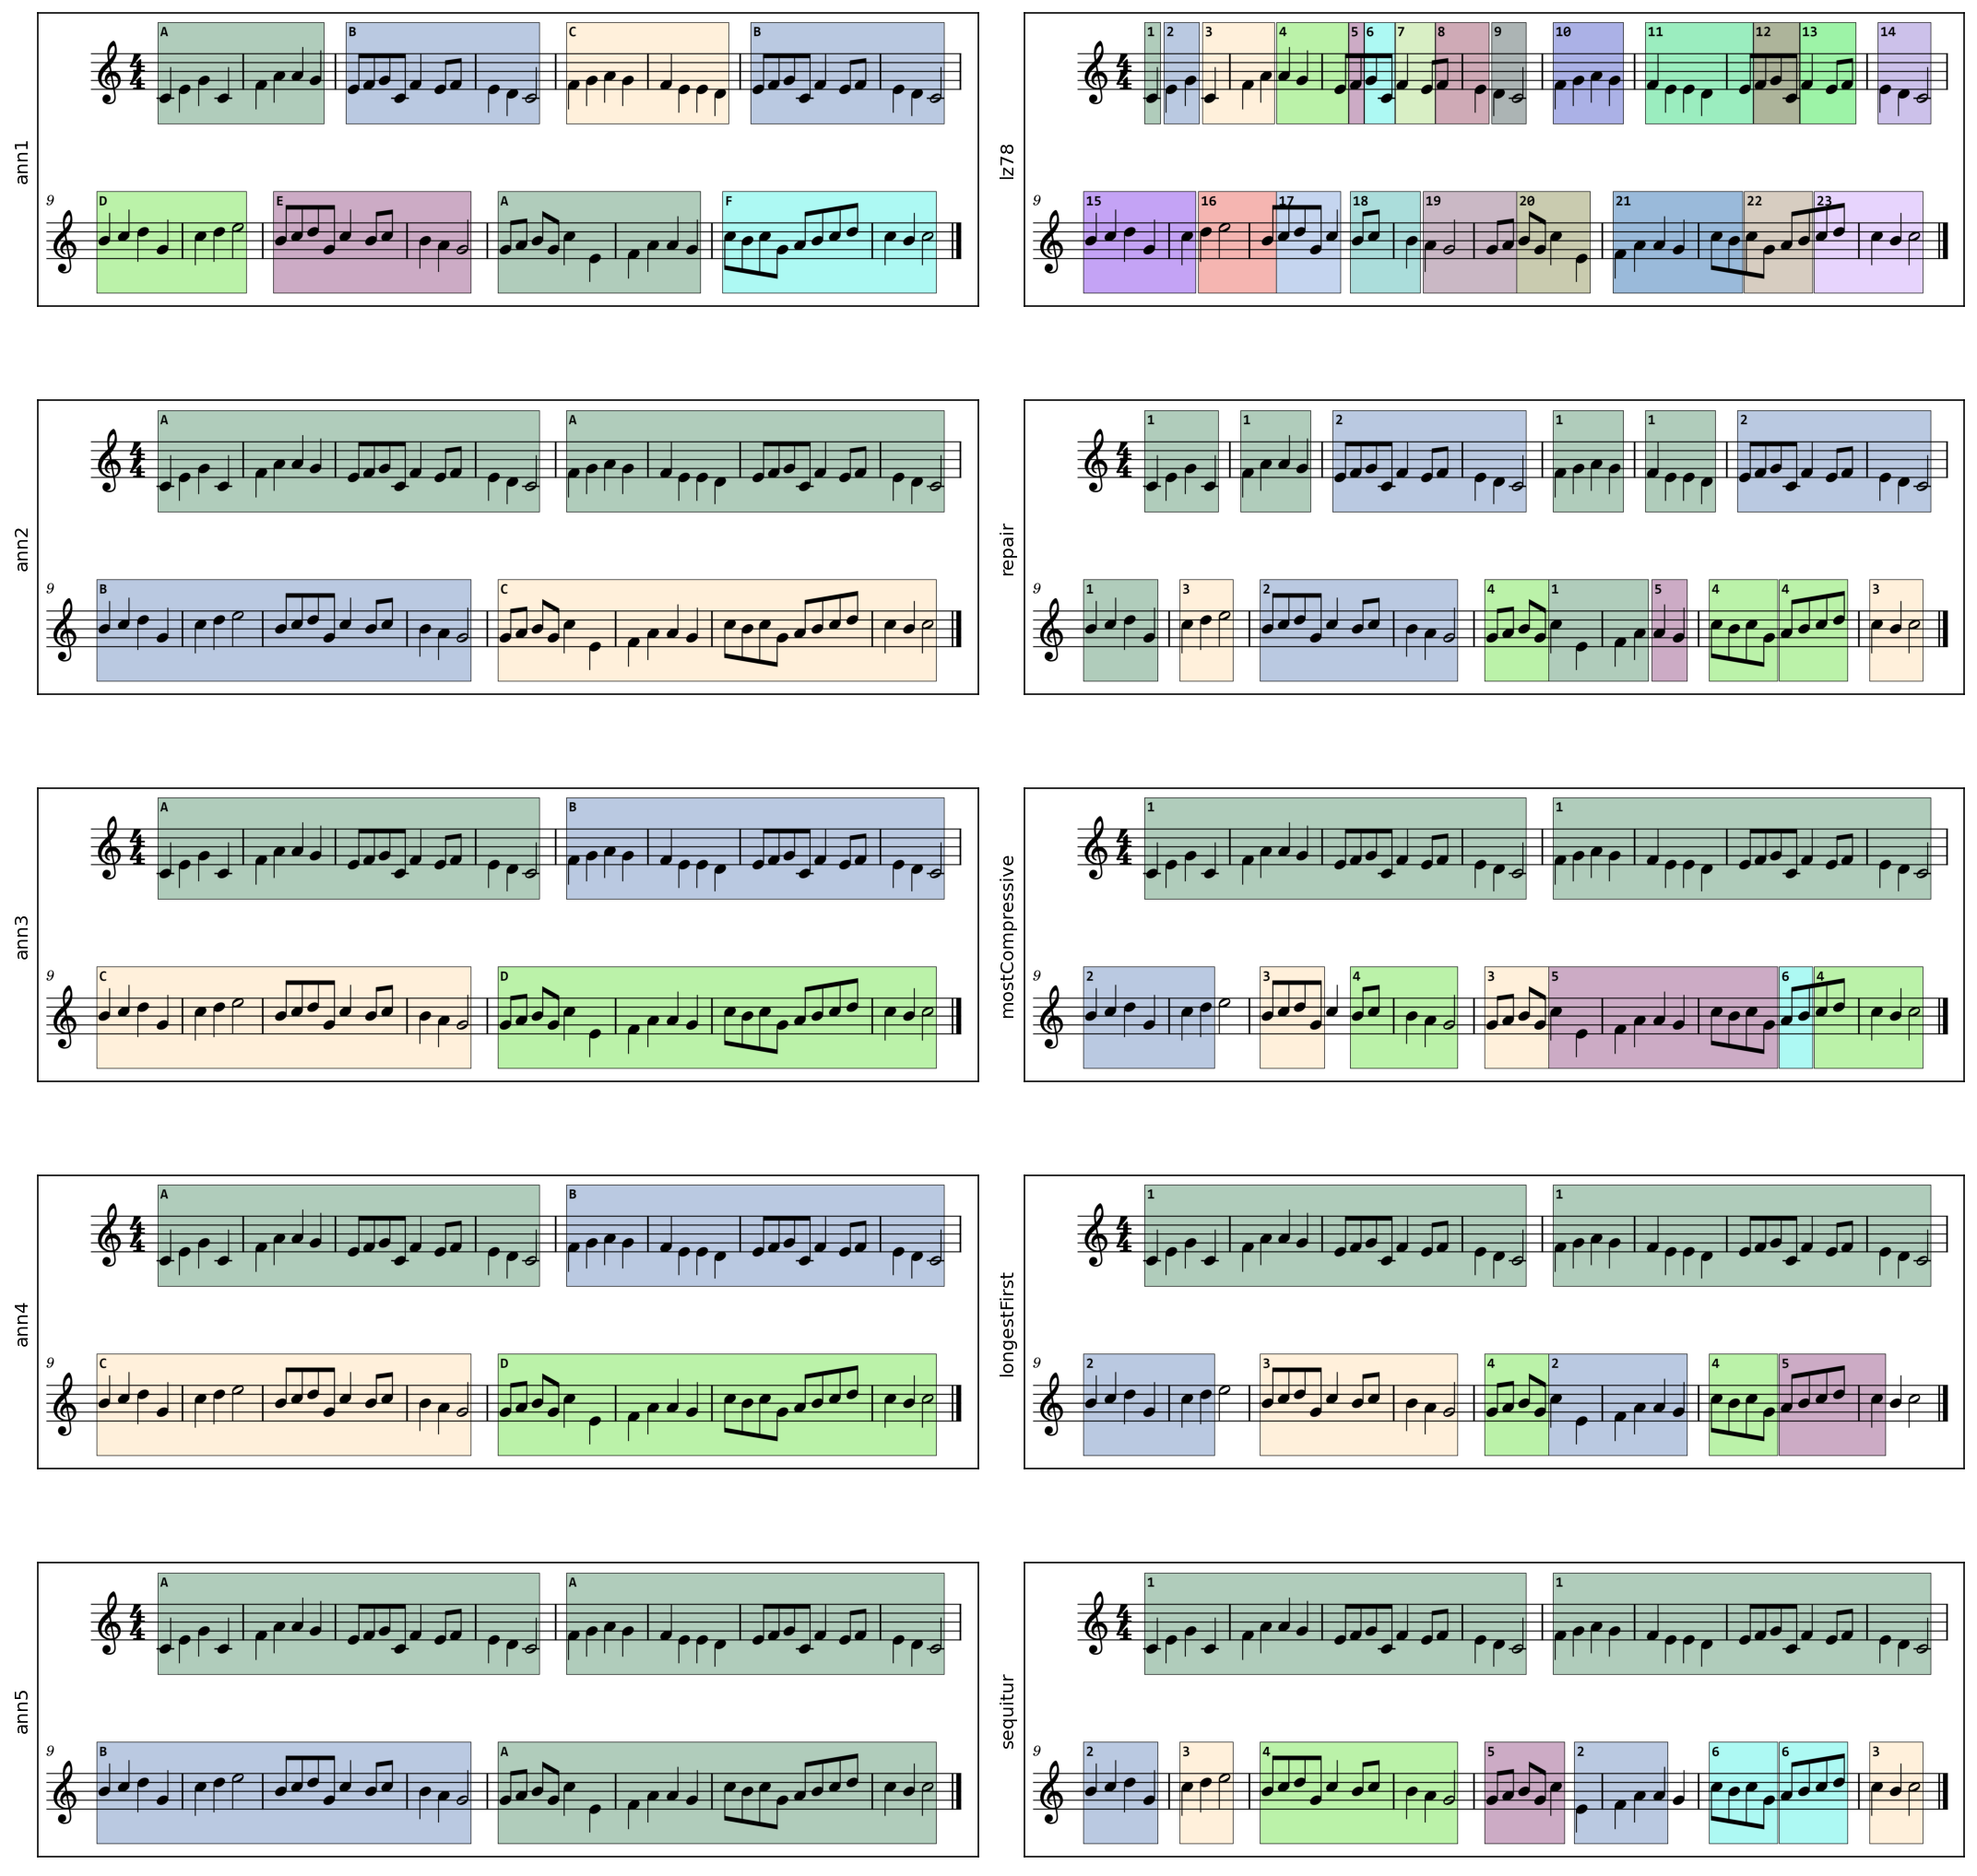

In [168]:
screenshotsPath = Path('../screenshots/hymn2')
scale = 5
fig, ax = plt.subplots(5, 2, figsize=(3*scale, 3*scale))

x, y = 240, 830
w, h = 3200, 370*2.7
def autocrop(img, x, y, w, h):
    img = img.crop((x, y, x+w, y+h))
    return img

files = {
    'ann1': '',
    'ann2': '',
    'ann3': '',
    'ann4': '',
    'ann5': '',
}

for i, screenshotFile in enumerate(screenshotsPath.glob('*.PNG')):
    name = screenshotFile.stem
    if name not in files:
        continue
    files[name] = screenshotFile

for i, (name, file) in enumerate(files.items()):
    img = Image.open(file)
    img = autocrop(img, x, y, w, h)
    # display(img)
    # break
    ax[i, 0].imshow(img)
    # ax[i].spines['top'].set_visible(False)
    # ax[i].spines['right'].set_visible(False)
    # ax[i].spines['left'].set_visible(False)
    # ax[i].spines['bottom'].set_visible(False)
    ax[i, 0].set_ylabel(name)
    ax[i, 0].set_xticks([])
    ax[i, 0].set_yticks([])

files = {
    'lz78': '',
    'repair': '',
    'mostCompressive': '',
    'longestFirst': '',
    'sequitur': '',
}

for i, screenshotFile in enumerate(screenshotsPath.glob('*.PNG')):
    name = screenshotFile.stem
    if name not in files:
        continue
    files[name] = screenshotFile

print(files)

for i, (name, file) in enumerate(files.items()):
    img = Image.open(file)
    img = autocrop(img, x, y, w, h)
    # display(img)
    # break
    ax[i, 1].imshow(img)
    # ax[i].spines['top'].set_visible(False)
    # ax[i].spines['right'].set_visible(False)
    # ax[i].spines['left'].set_visible(False)
    # ax[i].spines['bottom'].set_visible(False)
    ax[i, 1].set_ylabel(name)
    ax[i, 1].set_xticks([])
    ax[i, 1].set_yticks([])

#     # ax[i].annotate(labels[i], xy=(1,0.5), xytext=(0, 15), ha='left', va='top',
#     #         xycoords='axes fraction', textcoords='offset points')
fig.tight_layout()
# ax[0].set_title(r'Discovered Patterns for Hymn 6, $\tau = 0.8$')

In [ ]:
with open()